In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from graphviz import Digraph


In [13]:
# Загрузка данных
df = pd.read_csv('./input/PS_20174392719_1491204439457_log.csv')

In [14]:
# Разделение данных на признаки и целевую переменную
X = df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]
y = df['isFraud']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

EPOCH_COUNT = 5

# Создание модели Keras
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение модели
H = model.fit(X_train_scaled, y_train, epochs=EPOCH_COUNT, batch_size=32, validation_split=0.2)

C:\Users\csode\.git\gitlab\lab\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 557s 4ms/step - accuracy: 0.9991 - loss: 0.0069 - val_accuracy: 0.9993 - val_loss: 0.0036
Epoch 2/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 507s 4ms/step - accuracy: 0.9993 - loss: 0.0040 - val_accuracy: 0.9993 - val_loss: 0.0038
Epoch 3/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 557s 4ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9994 - val_loss: 0.0037
Epoch 4/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 449s 4ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 5/5
127253/127253 ━━━━━━━━━━━━━━━━━━━━ 475s 4ms/step - accuracy: 0.9994 - loss: 0.0035 - val_accuracy: 0.9994 - val_loss: 0.0030


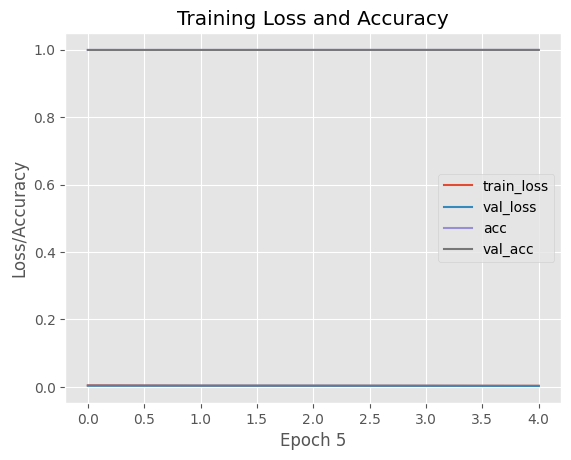

In [25]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, EPOCH_COUNT), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, EPOCH_COUNT), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, EPOCH_COUNT), H.history["accuracy"], label="acc")
plt.plot(np.arange(0, EPOCH_COUNT), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch %s" % str(EPOCH_COUNT))
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('foo.png')
plt.show()


In [17]:
# Оценка модели
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test accuracy: {test_accuracy}')

39767/39767 ━━━━━━━━━━━━━━━━━━━━ 107s 3ms/step - accuracy: 0.9994 - loss: 0.0029
Test accuracy: 0.9994051456451416


In [18]:
# Предсказание фрауда
predictions = model.predict(X_test_scaled)
fraud_predictions = (predictions > 0.5).astype(int)


39767/39767 ━━━━━━━━━━━━━━━━━━━━ 100s 3ms/step


In [19]:
# Добавление колонки с оценкой фрауда к тестовым данным
X_test['isFraudPrediction'] = fraud_predictions

result_df = pd.concat([X_test, y_test], axis=1)
print(result_df)


             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3737323   330218.42       20866.00       351084.42       452419.57   
264914     11647.08       30370.00        18722.92            0.00   
85647     152264.21      106589.00       258853.21       201303.01   
5899326  1551760.63           0.00            0.00      3198359.45   
2544263    78172.30     2921331.58      2999503.88       415821.90   
...             ...            ...             ...             ...   
2210524      917.99        9606.00         8688.01            0.00   
956542       480.58        4683.00         4202.42            0.00   
5474798   248511.67         507.00            0.00        23807.93   
878120    200008.65           0.00            0.00       589973.64   
1592828    48066.50      202207.00       250273.50       594770.06   

         newbalanceDest  isFraudPrediction  isFraud  
3737323       122201.15                  0        0  
264914             0.00                  0        0

In [20]:
result_df.to_csv('fraud_predictions.csv', index=False)

In [22]:
plt.savefig('foo.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
dot = Digraph()

dot.attr(rankdir='LR')

layers = [
    ('Input Layer', 3, 'blue', ['X1', 'X2', 'Xn'], 9, None),
    ('Hidden Layer 1', 3, 'red', ['A1', 'A2', 'An'], 64, 'relu'),
    ('Hidden Layer 2', 3, 'red', ['A1', 'A2', 'An'], 64, 'relu'),
    ('Output Layer', 2, 'green', ['1', '0'], 2, 'softmax')
]

added_nodes = {}

for layer_name, num_nodes, color, labels, num_neurons, activation_func in layers:
    label = f'{layer_name}\nNeurons: {num_neurons}\nActivation: {activation_func}' if activation_func else f'{layer_name}\nNeurons: {num_neurons}'
    with dot.subgraph(name='cluster_' + layer_name.replace(' ', '_')) as c:
        c.attr(color=color, label=label, labelloc='t')
        added_nodes[layer_name] = []
        for i in range(num_nodes):
            node_name = f'{layer_name}_{i}'
            c.node(node_name, shape='circle', style='filled', fillcolor='white', label=labels[i])
            added_nodes[layer_name].append(node_name)

for i in range(len(layers) - 1):
    current_layer_name, _, _, _, _, _ = layers[i]
    next_layer_name, _, _, _, _, _ = layers[i + 1]
    for current_node_name in added_nodes[current_layer_name]:
        if current_layer_name != next_layer_name:  # Исключаем добавление рёбер для текущего слоя
            for next_node_name in added_nodes[next_layer_name]:
                dot.edge(current_node_name, next_node_name)


dot.render('model_visualization', format='png')
dot